In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# task 1

df = pd.read_csv('DS3_C1_S4_SuperstoreSales_Data_Challenge.csv',index_col='Order Date',parse_dates=True)
df.sort_index(inplace = True)
df

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,01-10-2014,Standard Class,Home Office,United States,Henderson,Kentucky,42420,South,Furniture,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,01-12-2014,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Furniture,76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,1/15/2014,Standard Class,Corporate,United States,Springfield,Virginia,22153,South,Furniture,51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,1/14/2014,First Class,Consumer,United States,Dover,Delaware,19901,East,Furniture,9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,1/16/2014,Second Class,Consumer,United States,Mount Pleasant,South Carolina,29464,South,Furniture,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,7637,US-2017-158526,01-01-2018,Second Class,Consumer,United States,Louisville,Kentucky,40214,South,Furniture,258.750,3,0.0,77.6250
2017-12-29,7633,US-2017-158526,01-01-2018,Second Class,Consumer,United States,Louisville,Kentucky,40214,South,Furniture,1207.840,8,0.0,314.0384
2017-12-29,5132,CA-2017-146626,01-05-2018,Standard Class,Corporate,United States,Anaheim,California,92804,West,Furniture,101.120,8,0.0,37.4144


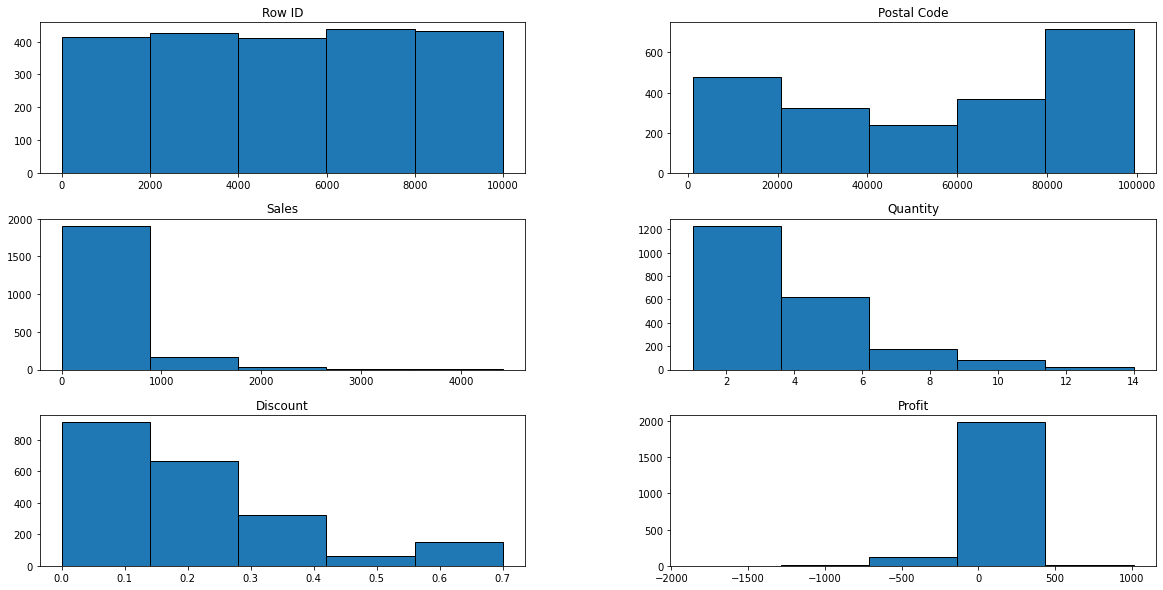

In [3]:
df.hist(figsize=(20,10), edgecolor = 'black', grid = False, bins = 5);

In [4]:
df = df['Sales'].resample('M').sum()

In [5]:
df

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

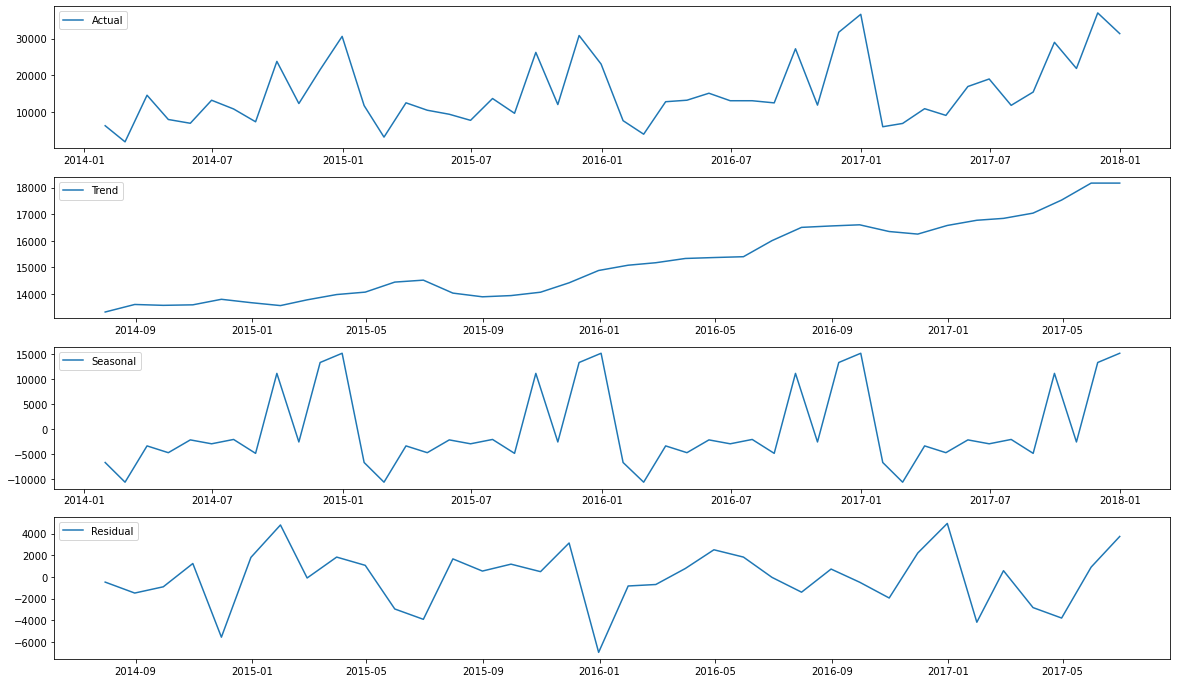

In [6]:
decomposition = seasonal_decompose(df, period = 12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid


# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df,label='Actual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [7]:
# task 2

def checkstationary(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        print('Data is Stationary')
    elif pvalue > 0.05:
        print('Data is not Stationary')

checkstationary(df)

8.450793985809671e-05
Data is Stationary


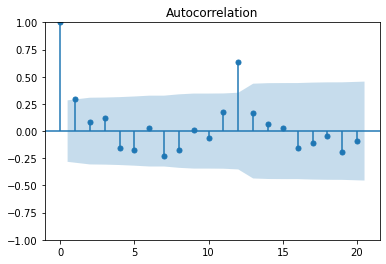

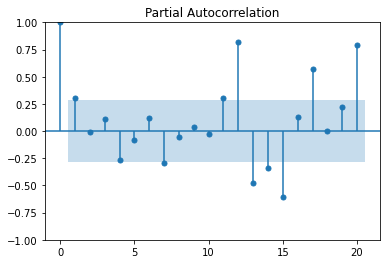

In [8]:
plot_acf(df,lags=20)
plot_pacf(df,lags=20);  # p = 9, q = 2 determined

In [9]:
# task 3  (actually 4, duplicate question present in the challenge slides)

mod1 = ARIMA(df , order = (1,0,0))
mfit1 = mod1.fit()
mfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -502.816
Date:                Thu, 02 Mar 2023   AIC                           1011.631
Time:                        21:22:03   BIC                           1017.245
Sample:                    01-31-2014   HQIC                          1013.753
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.546e+04   1874.269      8.248      0.000    1.18e+04    1.91e+04
ar.L1          0.3176      0.131      2.417      0.016       0.060       0.575
sigma2      7.327e+07      0.114   6.44e+08      0.000    7.33e+07    7.33e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.96   Prob(JB):                         0.17
Heteroskedasticity (H):               1.90   Skew:                             0.63
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+26. Standard errors may be unstable.
"""

In [10]:
mod2 = ARIMA(df, order = (1,1,1))
mfit2 = mod2.fit()
mfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -494.372
Date:                Thu, 02 Mar 2023   AIC                            994.745
Time:                        21:22:04   BIC                           1000.295
Sample:                    01-31-2014   HQIC                           996.833
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2602      0.283      0.919      0.358      -0.295       0.815
ma.L1         -0.8855      0.162     -5.475      0.000      -1.202      -0.568
sigma2      9.203e+07   1.07e-09   8.61e+16      0.000     9.2e+07     9.2e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.64   Prob(JB):                         0.57
Heteroskedasticity (H):               1.88   Skew:                             0.32
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.4e+32. Standard errors may be unstable.
"""

In [11]:
mod3 = ARIMA(df, order = (1,2,1))
mfit3 = mod3.fit()
mfit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -488.748
Date:                Thu, 02 Mar 2023   AIC                            983.496
Time:                        21:22:04   BIC                            988.982
Sample:                    01-31-2014   HQIC                           985.551
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3996      0.123     -3.243      0.001      -0.641      -0.158
ma.L1         -1.0000      0.183     -5.449      0.000      -1.360      -0.640
sigma2      9.289e+07   1.98e-09    4.7e+16      0.000    9.29e+07    9.29e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.39   Prob(JB):                         0.15
Heteroskedasticity (H):               1.64   Skew:                            -0.66
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+32. Standard errors may be unstable.
"""

In [12]:
mod4 = ARIMA(df, order = (1,1,2))
mfit4 = mod4.fit()
mfit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -494.254
Date:                Thu, 02 Mar 2023   AIC                            996.508
Time:                        21:22:04   BIC                           1003.909
Sample:                    01-31-2014   HQIC                           999.293
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4910      1.552      0.316      0.752      -2.550       3.532
ma.L1         -1.1264      1.560     -0.722      0.470      -4.183       1.930
ma.L2          0.2057      1.135      0.181      0.856      -2.019       2.431
sigma2      9.072e+07   2.35e-08   3.87e+15      0.000    9.07e+07    9.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.70   Prob(JB):                         0.74
Heteroskedasticity (H):               1.90   Skew:                             0.20
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.68e+31. Standard errors may be unstable.
"""

In [13]:
mod5 = ARIMA(df, order = (1,2,3))
mfit5 = mod5.fit()
mfit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -487.338
Date:                Thu, 02 Mar 2023   AIC                            984.676
Time:                        21:22:04   BIC                            993.819
Sample:                    01-31-2014   HQIC                           988.101
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9966      0.142     -7.032      0.000      -1.274      -0.719
ma.L1         -0.4279      0.425     -1.007      0.314      -1.261       0.405
ma.L2         -0.9290      0.465     -2.000      0.046      -1.840      -0.018
ma.L3          0.4505      0.308      1.461      0.144      -0.154       1.055
sigma2      1.088e+08   7.32e-09   1.49e+16      0.000    1.09e+08    1.09e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.98
Prob(Q):                              0.87   Prob(JB):                         0.14
Heteroskedasticity (H):               1.70   Skew:                            -0.64
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+33. Standard errors may be unstable.
"""

In [14]:
mod6 = ARIMA(df, order = (3,2,1))
mfit6 = mod6.fit()
mfit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -487.958
Date:                Thu, 02 Mar 2023   AIC                            985.916
Time:                        21:22:04   BIC                            995.059
Sample:                    01-31-2014   HQIC                           989.341
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5131      0.303     -1.693      0.090      -1.107       0.081
ar.L2         -0.2972      0.387     -0.767      0.443      -1.057       0.462
ar.L3          0.0404      0.402      0.101      0.920      -0.747       0.828
ma.L1         -0.9724      0.332     -2.933      0.003      -1.622      -0.323
sigma2       1.26e+08   3.22e-09   3.91e+16      0.000    1.26e+08    1.26e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.98   Prob(JB):                         0.78
Heteroskedasticity (H):               1.78   Skew:                            -0.21
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.12e+31. Standard errors may be unstable.
"""

In [15]:
i = int(0.7*len(df))
train = df[:i]
test = df[i:]

In [16]:
predictions = mfit3.predict(0,len(test)-1)
print(predictions)

Order Date
2014-01-31        0.000000
2014-02-28     8124.504738
2014-03-31     5361.900115
2014-04-30    13959.318233
2014-05-31    13700.376501
2014-06-30     9174.156318
2014-07-31    13170.414683
2014-08-31    13935.750782
2014-09-30    10093.093109
2014-10-31    20058.563968
2014-11-30    18993.020679
2014-12-31    20178.218893
2015-01-31    30175.391386
2015-02-28    21077.319083
2015-03-31     7109.324789
Freq: M, Name: predicted_mean, dtype: float64


In [17]:
forecasted = mfit3.forecast(12)
forecasted

2018-01-31    34617.664765
2018-02-28    34287.525211
2018-03-31    35372.145622
2018-04-30    35891.411531
2018-05-31    36636.599660
2018-06-30    37291.506648
2018-07-31    37982.491028
2018-08-31    38659.058463
2018-09-30    39341.387077
2018-10-31    40021.413457
2018-11-30    40702.359836
2018-12-31    41382.938573
Freq: M, Name: predicted_mean, dtype: float64

In [18]:
actual = []
pred = []

for i in range(len(predictions)):
    actual.append(test.iloc[i])
    pred.append(predictions[i])

dfer = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
dfer['error'] = dfer['Actual'] - dfer['Predictions']

dfer

,Actual,Predictions,error
0,11872.5770,0.000000,11872.577000
1,31783.6288,8124.504738,23659.124062
2,36678.7150,5361.900115,31316.814885
3,5964.0320,13959.318233,-7995.286233
4,6866.3374,13700.376501,-6834.039101
5,10893.4448,9174.156318,1719.288482
6,9065.9581,13170.414683,-4104.456583
7,16957.5582,13935.750782,3021.807418
8,19008.5867,10093.093109,8915.493591
9,11813.0220,20058.563968,-8245.541968


In [19]:
mse = mean_squared_error(dfer['Actual'] , dfer['Predictions'])

mse, np.sqrt(mse)

(198260826.78948113, 14080.51230564716)

<AxesSubplot:>

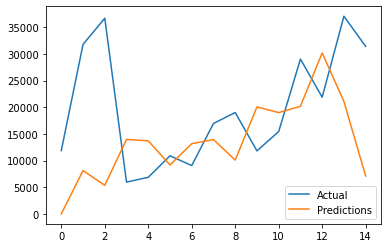

In [20]:
dfer[['Actual','Predictions']].plot()

In [21]:
# task 4 (5th according to challenge slides incorrect sequence)

sari = sm.tsa.statespace.SARIMAX(train, order = (1,1,0) , seasonal_order = (1,1,1,2)).fit()
sari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 2)   Log Likelihood                -319.790
Date:                             Thu, 02 Mar 2023   AIC                            647.580
Time:                                     21:22:05   BIC                            653.185
Sample:                                 01-31-2014   HQIC                           649.373
                                      - 09-30-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3615      0.713     -0.507      0.612      -1.760       1.037
ar.S.L2       -0.3299      1.197     -0.276      0.783      -2.676       2.017
ma.S.L2       -0.8500      0.576     -1.475      0.140      -1.979       0.279
sigma2      1.891e+08   2.02e-09   9.36e+16      0.000    1.89e+08    1.89e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.66   Prob(JB):                         0.67
Heteroskedasticity (H):               0.76   Skew:                            -0.36
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.79e+33. Standard errors may be unstable.
"""

In [22]:
pvalue = sm.stats.acorr_ljungbox(sari.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject Ho')
else:
    print('Accept Ho')

[0.51644943]
Accept Ho


In [23]:
forecasted = sari.forecast(12)
forecasted

2016-10-31    19485.746007
2016-11-30    22302.667453
2016-12-31    19459.497626
2017-01-31    25296.951949
2017-02-28    21160.773948
2017-03-31    25880.816649
2017-04-30    22214.914303
2017-05-31    27287.775953
2017-06-30    23472.446832
2017-07-31    28426.851909
2017-08-31    24661.563661
2017-09-30    29654.776658
Freq: M, Name: predicted_mean, dtype: float64

In [24]:
predictions = sari.predict(0,len(test)-1)
print(predictions)

Order Date
2014-01-31        0.000000
2014-02-28     5480.842550
2014-03-31     4966.063014
2014-04-30    10731.177741
2014-05-31    13988.173514
2014-06-30     6603.077792
2014-07-31    17457.438831
2014-08-31    10196.447868
2014-09-30    12342.461112
2014-10-31    19206.401639
2014-11-30    17539.293681
2014-12-31    18525.506099
2015-01-31    32638.943506
2015-02-28    15176.917376
2015-03-31    14536.578903
Freq: M, Name: predicted_mean, dtype: float64


In [25]:
actual = []
pred = []

for i in range(len(predictions)):
    actual.append(test.iloc[i])
    pred.append(predictions[i])

dfer2 = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
dfer2['error'] = dfer2['Actual'] - dfer2['Predictions']

dfer2

,Actual,Predictions,error
0,11872.5770,0.000000,11872.577000
1,31783.6288,5480.842550,26302.786250
2,36678.7150,4966.063014,31712.651986
3,5964.0320,10731.177741,-4767.145741
4,6866.3374,13988.173514,-7121.836114
5,10893.4448,6603.077792,4290.367008
6,9065.9581,17457.438831,-8391.480731
7,16957.5582,10196.447868,6761.110332
8,19008.5867,12342.461112,6666.125588
9,11813.0220,19206.401639,-7393.379639


In [26]:
mse = mean_squared_error(dfer2['Actual'] , dfer2['Predictions'])

mse, np.sqrt(mse)

(209286326.45421436, 14466.731712941053)

<AxesSubplot:>

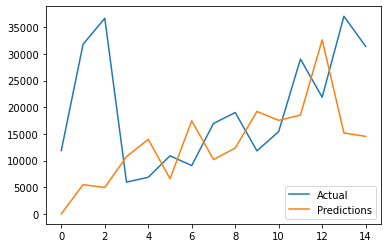

In [27]:
dfer2[['Actual','Predictions']].plot()